In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from sklearn.datasets import load_diabetes, load_breast_cancer
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

# Autoreload of the files
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [82]:
# Load dataset
X, y = load_diabetes(return_X_y=True)
data = load_diabetes()
random_state = 4

In [84]:
features = data.feature_names
n = len(features)
print(n)

10


# 1 - Linear regression
***

**Question :** Quick visualization to understand your data set.

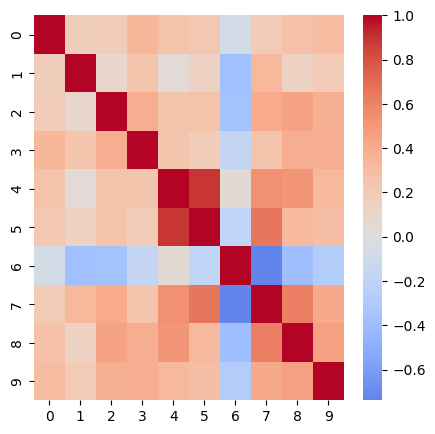

In [87]:
# Correlation matrix
corrmat = np.corrcoef(X, rowvar=False)
plt.figure(figsize=(5, 5))
sns.heatmap(corrmat, annot=False, cmap='coolwarm', center=0)
plt.show()


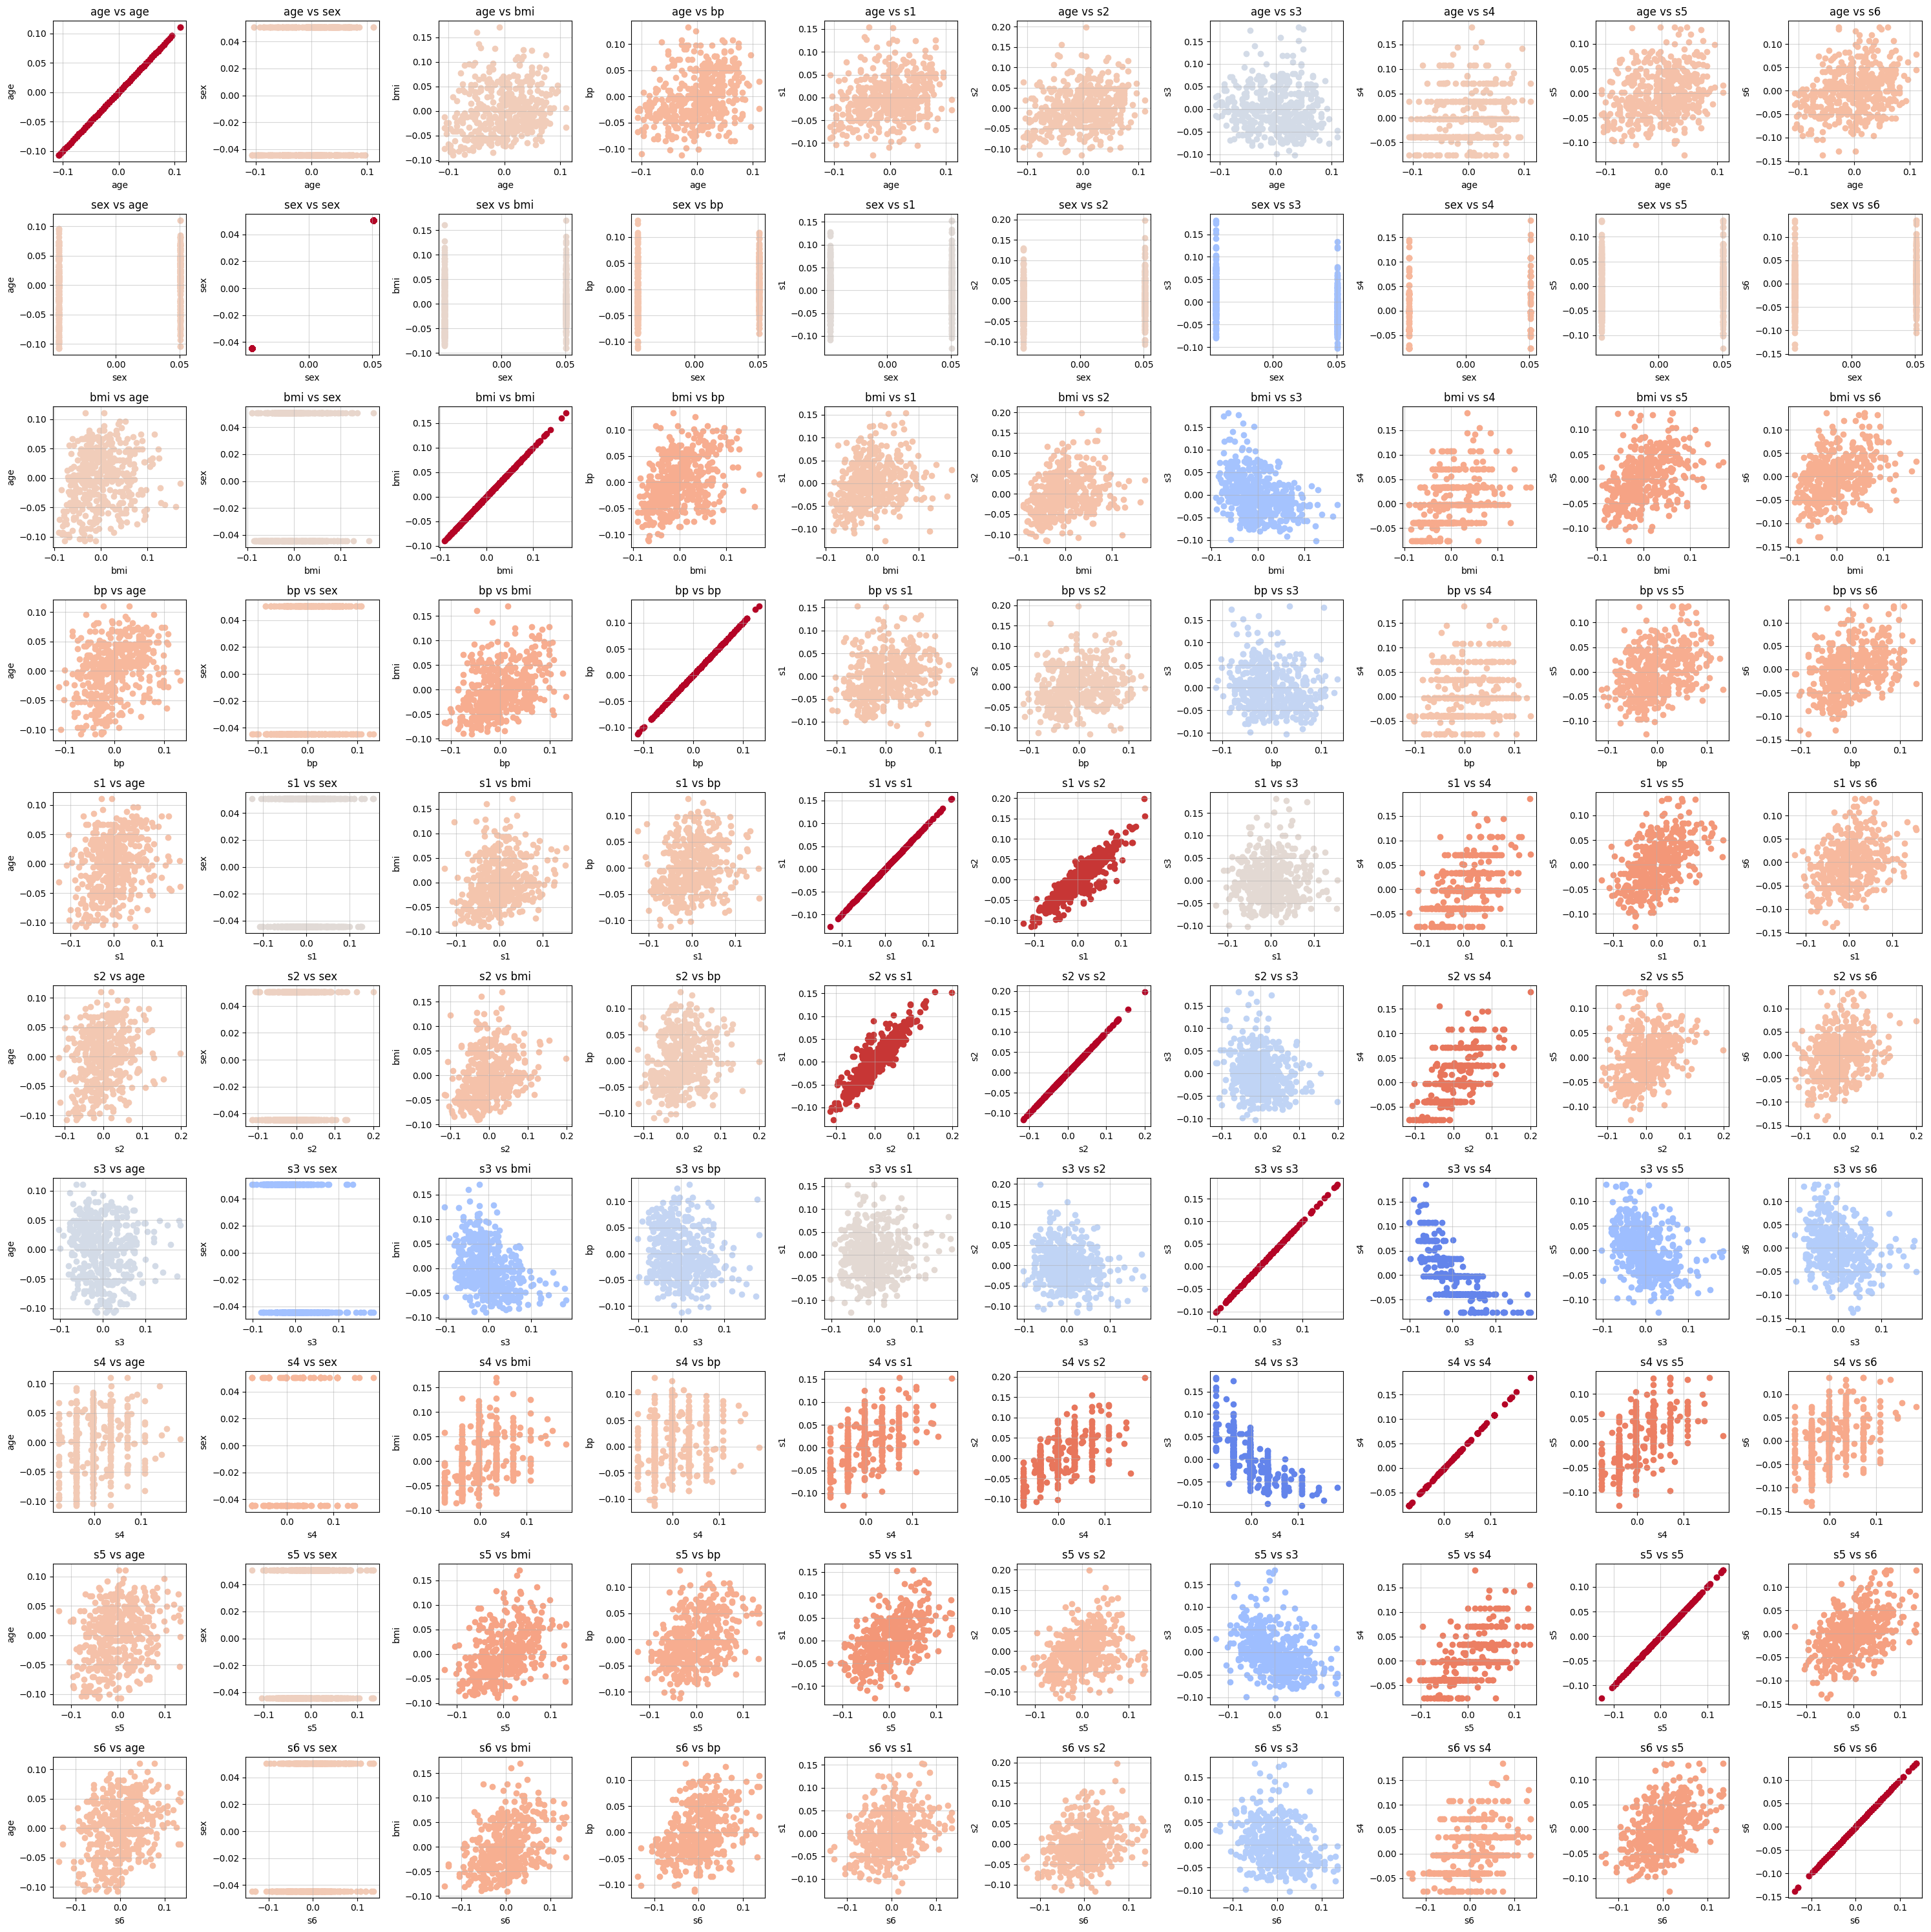

In [88]:
# Viz
cmap = plt.cm.coolwarm
fig, axs = plt.subplots(n, n, figsize=(30, 30))
for i in range(n):
    for j in range(n):
        color = cmap((corrmat[i, j] + 1) / 2)  # Normalize correlation to [0,1] for colormap
        axs[i, j].scatter(X[:, i], X[:, j], c=[color])  # Create new scatter plot with specific color
        axs[i, j].set_xlabel(features[i])
        axs[i, j].set_ylabel(features[j])
        axs[i, j].set_title(f'{features[i]} vs {features[j]}')
        axs[i, j].grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

**Question :** Split your data set into train and test sets, train a simple linear regression model and plot the performance of the model on the test set.

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_linear = model.predict(X_test)
print("Linear Regression")
print("MSE:", mean_squared_error(y_test, y_pred_linear))
print("R2:", r2_score(y_test, y_pred_linear))
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_linear):.2f}")

Linear Regression
MSE: 2900.1936284934814
R2: 0.4526027629719195
MAPE: 0.37


# 2 - Ridge and Lasso regresssion
***

**Question :** Before diving into the modelisation, you have to prepare your cross-validation process for parametrization of Ridge and Lasso regressions. What do you do with your train set ? 

In [90]:
np.logspace(-6, 0, 7)

array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])

In [91]:
# Set up the cross validation
from re import A
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold

# Fit polynomial regression
alphas = np.logspace(-6, 0, 15)
avg_r2_ridge = np.zeros(len(alphas))
avg_r2_lasso = np.zeros(len(alphas))
for idx, alpha in enumerate(alphas):
    kf = KFold(n_splits=4)
    current_r2_ridge = np.zeros(4)
    current_r2_lasso = np.zeros(4)
    for i, (train_index, val_index) in enumerate(kf.split(y_train)):
        # Sub_split
        X_sub_train = X_train[train_index]
        y_sub_train = y_train[train_index]
        X_val = X_train[val_index]
        y_val = y_train[val_index]

        # Ridge
        model_ridge = Ridge(alpha=alpha)
        model_ridge.fit(X_sub_train, y_sub_train)
        y_pred_ridge = model_ridge.predict(X_val)
        current_r2_ridge[i] = r2_score(y_val, y_pred_ridge)

        # Lasso
        model_lasso = Lasso(alpha=alpha)
        model_lasso.fit(X_sub_train, y_sub_train)
        y_pred_lasso = model_lasso.predict(X_val)
        current_r2_lasso[i] = r2_score(y_val, y_pred_lasso)

    # Compute avg
    avg_r2_ridge[idx] = np.mean(current_r2_ridge)
    avg_r2_lasso[idx] = np.mean(current_r2_lasso)

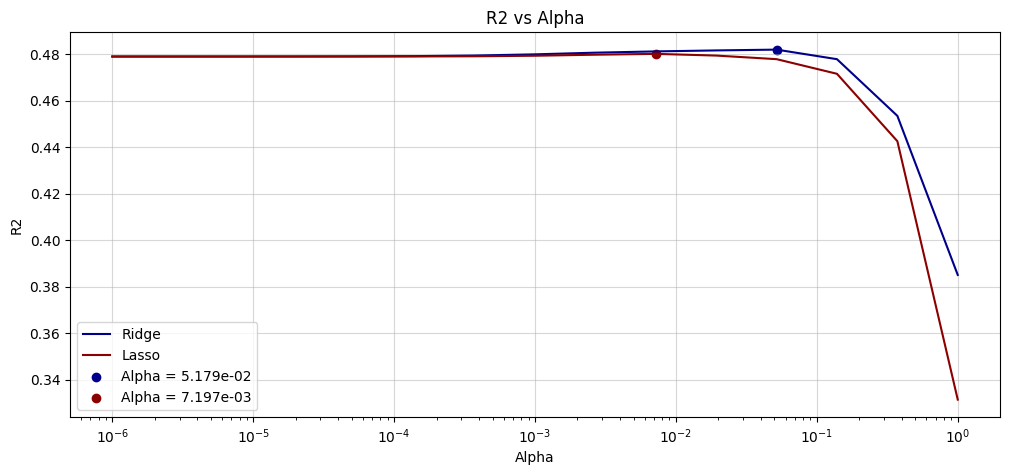

In [92]:
# Display the results
max_idx_ridge = np.argmax(avg_r2_ridge)
max_idx_lasso = np.argmax(avg_r2_lasso)
plt.figure(figsize=(12, 5))
plt.plot(alphas, avg_r2_ridge, label='Ridge', color = 'darkblue')
plt.plot(alphas, avg_r2_lasso, label='Lasso', color = 'darkred')
plt.scatter(alphas[max_idx_ridge], avg_r2_ridge[max_idx_ridge], label = f'Alpha = {alphas[max_idx_ridge]:.3e}', color = 'darkblue')
plt.scatter(alphas[max_idx_lasso], avg_r2_lasso[max_idx_lasso], label = f'Alpha = {alphas[max_idx_lasso]:.3e}', color = 'darkred')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R2')
plt.title('R2 vs Alpha')
plt.grid(True, alpha = 0.5)
plt.legend()
plt.show()


In [93]:
# Final models Ridge and Lasso
model_final_ridge = Ridge(alpha=alphas[max_idx_ridge])
model_final_lasso = Lasso(alpha=alphas[max_idx_lasso])

# Training the models
model_final_ridge.fit(X_train, y_train)
model_final_lasso.fit(X_train, y_train)

# Testing the models
y_pred_ridge = model_final_ridge.predict(X_test)
y_pred_lasso = model_final_lasso.predict(X_test)

# Print the metrics
print("Linear Regression")
print("MSE:", mean_squared_error(y_test, y_pred_linear))
print("R2:", r2_score(y_test, y_pred_linear))
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_linear):.2f}")
print()
print("Ridge")
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R2:", r2_score(y_test, y_pred_ridge))
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_ridge):.2f}")
print()
print("Lasso")
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R2:", r2_score(y_test, y_pred_lasso))
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_lasso):.2f}")

Linear Regression
MSE: 2900.1936284934814
R2: 0.4526027629719195
MAPE: 0.37

Ridge
MSE: 2865.813535260928
R2: 0.45909183592876324
MAPE: 0.37

Lasso
MSE: 2881.8864154367434
R2: 0.45605815910357306
MAPE: 0.37


### Parametrization

**Question :** You have a parameter lambda for each method ridge and lasso that you need to determine for your models. To do so, you will train and validate a model for each possible values of lambda from the following sets :

[1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]

In [ ]:
# Train and validate your model's parameters

### Final train with the best parameters

**Question :** Train your model with the best parameters found in the previous question. Then, plot the predictions of your model on the test set.

In [ ]:
# Train and test your best model (you can compare the performances with the results find in linear regression)

In [39]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data[:, 0].reshape(-1, 1)  # Single pixel feature
y = (digits.target == 0).astype(int)  # Binary target: is 0 or not

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9044444444444445
Confusion Matrix:
 [[407   0]
 [ 43   0]]


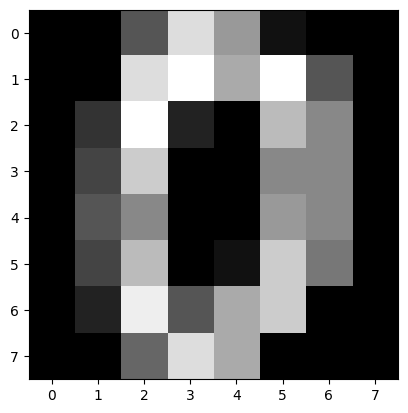

In [40]:
# Plot digits
plt.imshow(digits.images[0], cmap='gray')
plt.show()


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9733333333333334
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      0.97      0.97        37
           2       0.97      0.97      0.97        38
           3       0.96      0.96      0.96        46
           4       1.00      0.98      0.99        55
           5       0.95      0.97      0.96        59
           6       0.98      0.98      0.98        45
           7       1.00      0.98      0.99        41
           8       0.95      0.97      0.96        38
           9       0.96      0.96      0.96        48

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



/Users/gaspardvilla/miniconda3/envs/nat_ada/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
